In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-foundations-sign-language-detection/sample_submission.csv
/kaggle/input/ai-foundations-sign-language-detection/train.csv
/kaggle/input/ai-foundations-sign-language-detection/test.csv


In [39]:
df_train = pd.read_csv('/kaggle/input/ai-foundations-sign-language-detection/train.csv')
df_test = pd.read_csv('/kaggle/input/ai-foundations-sign-language-detection/test.csv')
df_submit = pd.read_csv('/kaggle/input/ai-foundations-sign-language-detection/sample_submission.csv')

df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [40]:
X_train = df_train.iloc[:, 1:].values
y_train = df_train.iloc[:, 0].values
#print(X_train)
#print(y_train)
test_ids = df_test.iloc[:, 0].values  #id column
X_test = df_test.iloc[:, 1:].values  #pixel column

X_train = X_train.astype('float32') / 255.0 #normalizing the values of pixels between 0-1
X_test = X_test.astype('float32') / 255.0 

X_train = X_train.reshape(-1,28,28,1) #reshaping as we have done in the assignment
X_test = X_test.reshape(-1,28,28,1)

In [41]:
y_train, label_mapping = pd.factorize(y_train)
num = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train,num) #one hot encoding the labels

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping

#model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.7329 - loss: 0.9130 - val_accuracy: 0.9628 - val_loss: 0.1176
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9934 - loss: 0.0271 - val_accuracy: 0.8598 - val_loss: 0.4619
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.9951 - loss: 0.0185 - val_accuracy: 1.0000 - val_loss: 7.2178e-04
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.9923 - loss: 0.0257 - val_accuracy: 0.9710 - val_loss: 0.0866
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.9982 - loss: 0.0077 - val_accuracy: 0.9911 - val_loss: 0.0337
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 6.0717e-05
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 1.0000 - loss: 3.8498e-04 - val_accuracy: 0.9985 - val_loss: 0.0053
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.9835 - los

687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9910 - loss: 0.0268
Training Loss: 0.0278
Training Accuracy: 0.9908


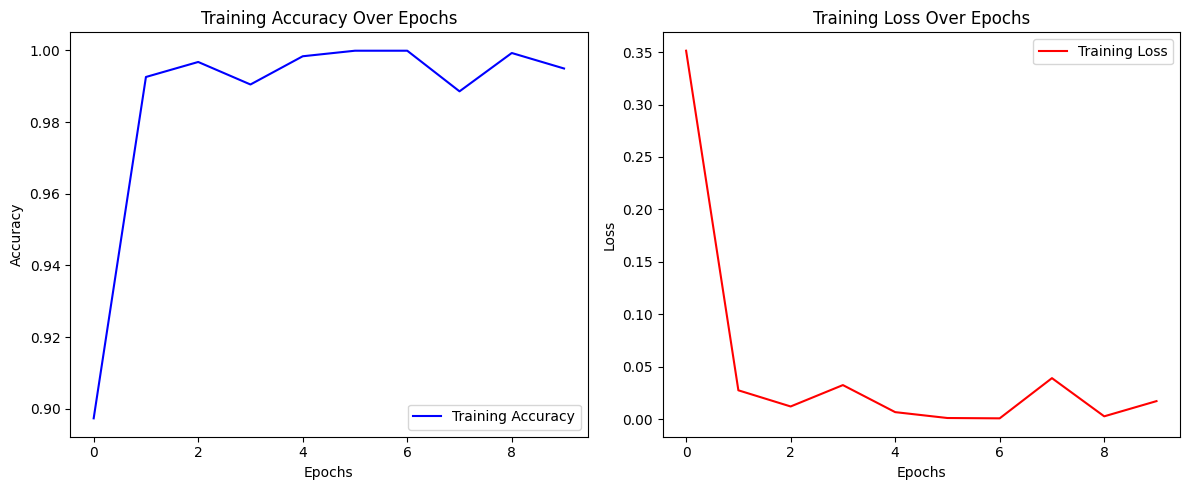

In [44]:
#added model evaluationfor history
loss, accuracy = model.evaluate(X_train, y_train, verbose=1)
print(f"Training Loss: {loss:.4f}")
print(f"Training Accuracy: {accuracy:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='b')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='r')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [45]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

df_submit['id'] = test_ids  
df_submit['label'] = predicted_labels 
df_submit.to_csv('submission.csv', index=False)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [46]:
model.save('cnn_model.h5')